In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import fnmatch
import os
import re

Ploting resutls

From Pavel PMSM Tutorial:

The air gap flux density can be easily obtained in ParaView. For this purpose first apply Cell Data To Point Data filter in the pipeline, which will convert vector data to scalar data on the points. And then, apply Plot On Intersection Curves filter. Where first select Slice Type as Sphere with radius of the middle of the air gap. And then, tick in the Line Series just Magnetic Flux Density_Magnitude.
File -> Save Data (in *.csv format)

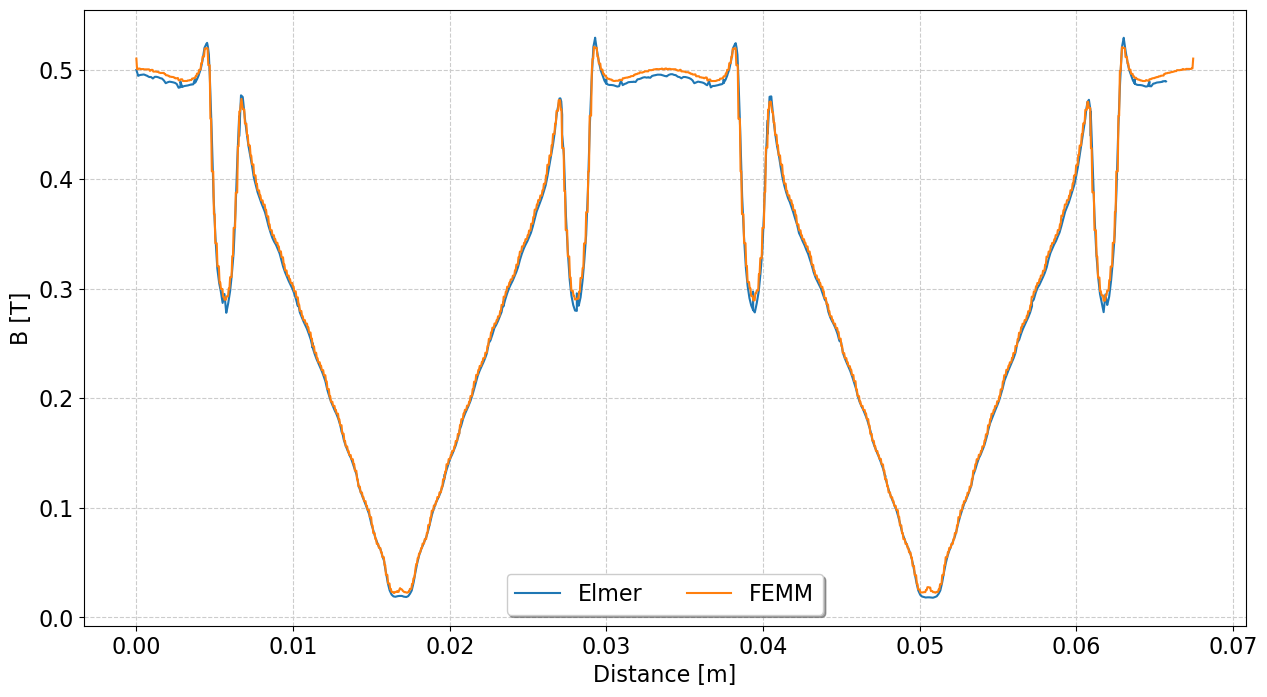

In [4]:
# Reading data from Elmer / Paraview. 

pv_res = pd.read_csv('./curves/paraview_plot.csv')

pv_x = np.array(pv_res['Points:0'])
pv_y = np.array(pv_res['Points:1'])
ef_dis = np.array(pv_res['arc_length'])[30:1342]
pv_Bx = np.array(pv_res['magnetic flux density:0'])[30:1342]
pv_By = np.array(pv_res['magnetic flux density:1'])[30:1342]

ef_dis = ef_dis - ef_dis[0]
ef_absB = np.sqrt(pv_Bx**2 + pv_By**2)

# fm_res = pd.read

# Reading data from FEMM. 


with open('./curves/femm_airgap_absB.txt', 'r') as f:
    fm_res = f.read()


pattern1 = '\t' # space patter used to delimit values
spc_pattern = ' '
brk_pattern = '\n'

fm_res = re.sub(pattern1, spc_pattern, fm_res)

iter_ln_vector = re.finditer(brk_pattern, fm_res) # ln -> line

idx_ln = 0
ini_str = 0

matrix = np.empty((0,),float)

for iter_ln_val in iter_ln_vector:
    end_str = iter_ln_val.start()
    # print(end_str)    
    str_ln = fm_res[ini_str:end_str]
    
    ini_str = end_str + 1
    
    str_vl_vec = str_ln.split()


    values = np.empty((0,),float)

    for idx_value in range(len(str_vl_vec)):
        # values[idx_value] = float(str_vl_vec[idx_value])
        values = np.append(values,float(str_vl_vec[idx_value]))
    
    matrix = values.reshape(1,len(str_vl_vec)) if matrix.size == 0 else np.append(matrix,values.reshape(1,len(str_vl_vec)),axis=0)
    # print(values)

fm_dis = matrix[:,0]
fm_absB = matrix[:,1]

fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(ef_dis, ef_absB, label = 'Elmer')
ax.plot(fm_dis*1e-3, fm_absB, label = 'FEMM')
ax.legend(fontsize = 16, ncol = 2, fancybox=True, shadow=True)

# ax.set_title('Joint curve', fontsize = 16)

ax.set_xlabel('Distance [m]', fontsize = 16)
ax.set_ylabel('B [T]', fontsize = 16)
ax.tick_params(axis='both', which='major', labelsize=16)

ax.grid(color=(0.8, 0.8, 0.8), linestyle='--', linewidth=.8)


